In [1]:
### ATOC5860 - butterworth_example
### Originally from Libby Barnes (Colorado State University)
### Additional commenting/code from Jennifer Kay (University of Colorado)
### Last updated March 21, 2022

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.signal as sig
from matplotlib.gridspec import GridSpec
import timeit
import scipy.io as sio

In [2]:
### Calculate the response function of the butterworth filter
N = 4
freq = np.arange(0.,0.51,0.01)
omega = 2.*np.pi*freq
omega_c = .25*2*np.pi

N = 4
R2_4 = 1./(1. + (omega/omega_c)**(2*N))
N = 9
R2_9 = 1./(1. + (omega/omega_c)**(2*N))
N = 30
R2_q = 1./(1. + (omega/omega_c)**(2*N))

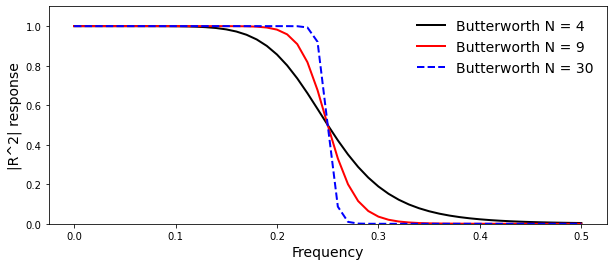

In [3]:
### Plot results
f=plt.figure(figsize=(10,4))
plt.plot(freq,R2_4,'-k',linewidth = 2, label = 'Butterworth N = 4');
plt.plot(freq,R2_9,'-r',linewidth = 2, label = 'Butterworth N = 9');
plt.plot(freq,R2_q,'--b',linewidth = 2, label = 'Butterworth N = 30');
plt.xlabel('Frequency',fontsize=14);
plt.ylabel('|R^2| response',fontsize=14);
plt.legend(fontsize = 14, frameon = False);
plt.ylim(0,1.1);

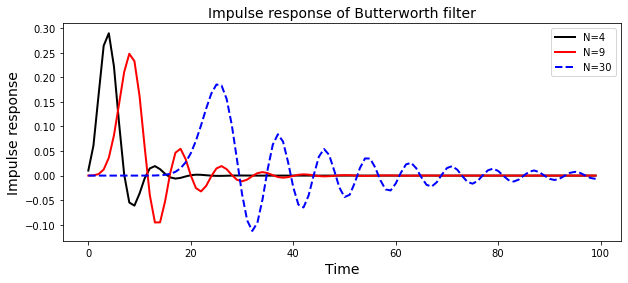

In [4]:
### impluse response of butterworth filters

x = np.zeros((100,))
x[0] = 1.

f=plt.figure(figsize=(10,4))
N = 4
b, a = sig.butter(N, .25)
y = sig.lfilter(b,a,x)
plt.plot(y,'-k',linewidth = 2, label = 'N=4')
N = 9
b, a = sig.butter(N, .25)
y = sig.lfilter(b,a,x)
plt.plot(y,'-r',linewidth = 2, label = 'N=9')
N = 30
b, a = sig.butter(N, .25)
y = sig.lfilter(b,a,x)
plt.plot(y,'--b',linewidth = 2, label = 'N=30');
plt.xlabel('Time',fontsize=14);
plt.ylabel('Impulse response',fontsize=14);
plt.title('Impulse response of Butterworth filter',fontsize=14);
plt.legend();

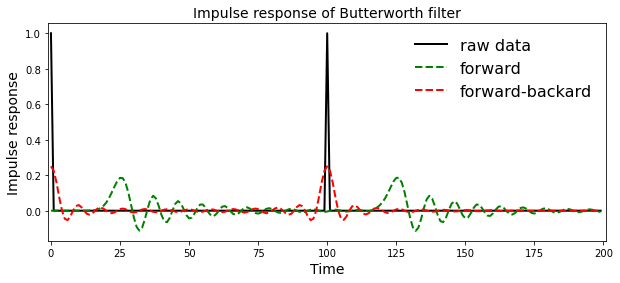

In [5]:
### impluse response at both ends of butterworth filters
x = np.zeros((200,))
x[0] = 1.
x[100] = 1.

f=plt.figure(figsize=(10,4))
plt.plot(x,'-k',linewidth = 2, label = 'raw data');
N = 30
b, a = sig.butter(N, .25)
y = sig.lfilter(b,a,x)
plt.plot(y,'--g',linewidth = 2, label = 'forward');
y2 = sig.lfilter(b,a,y[::-1])
y2 = y2[::-1]
plt.plot(y2,'--r',linewidth = 2, label = 'forward-backard');
plt.xlabel('Time',fontsize=14);
plt.ylabel('Impulse response',fontsize=14);
plt.title('Impulse response of Butterworth filter',fontsize=14);
plt.xlim(-1,np.size(x)+1);
plt.legend(frameon = False, fontsize = 16);